# ****Logistic Regression - a quick, applied introduction ****

## For this exercise, we will be using fake or "toy" data found on Kaggle 

*(Kaggle is a subsidiary of Google, it serves as an online community for data scientists and machine learning practitioners)*

The dataset is called "Social_Network_Ads.csv".

It is meant to represent the success of a company's ads on a social network like Facebook. 

The dataset contains information on whether or not a given user exposed to an ad ended up purchasing the product featured in the ad **(Purchased = 1 or 0)**.

The dataset also contains the three variables of **Gender, Age, and EstimatedSalary**. These variables are meant to represent the kind of user-profile data that would be available on a social networking site like Facebook. 


In [1]:
#First, before looking at the data, let's import all the packages we need to conduct our analysis.
#(nb:packages are helpful add-ons that allow us to easily transform/analyze our data with accessible functionality)

import math as m
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
#Let's load in the Social_Network_Ads data!

#For this exercise, I hosted the CSV data downloaded from Kaggle, and uploaded it to the public repository
#on my Github profile, which was created for this presentation.

url = 'https://raw.githubusercontent.com/enriqueolivojr/notebook-sharing-test/main/Social_Network_Ads.csv'
df = pd.read_csv(url) #an example of a helpful "add-on", the pandas (or pd) package helps us read .csv files!
df.head(5) #show the top 5 rows (or "head") of the dataset


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Exploratory Data Analysis (EDA)

Before diving into any type of regression, it is crucial for any Data Scientist to understand the data they are working with. 

So far, we know that this toy dataset contains 3 independent variables, and 1 dependent variable, represented by the columns. The rows represent each user that has interacted with our company's advertisement.

The column values have the following descriptions:

**Dependent Variable:**
1. "Purchased", a variable that takes either the value 1 or 0. Based on the notes provided by the dataset owner, we know that this variable represents whether or not a user exposed to an advertisement was successfully convinced to purchase the product being advertised.

**Independent Variables:**
1. "Gender" = The user's declared gender as featured on their social network profile, which in this dataset is split along Male and Female.
2. "Age" = The user's numerical age in years, as calculated from their profile's date of birth.
3. "EstimatedSalary" = The user's estimated salary based on the job title they feature on their social network profile.


## But what is the distribution like in each variable? 

# *Purchased*

0    257
1    143
Name: Purchased, dtype: int64
0    64.25
1    35.75
Name: Purchased, dtype: float64


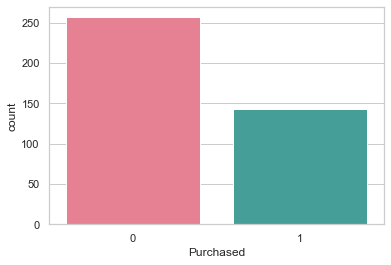

In [3]:
# Y, Purchased
#: It looks like within the entire dataset,
# 64.25% (n=257) did not purchase the product...35.75% (n=143) did purchase it
#numerical tables
print(df['Purchased'].value_counts()) #nominal count
print(df['Purchased'].value_counts(normalize=True) * 100) #percentage
#visualization
sns.countplot(x='Purchased',data=df,palette='husl')

# *Gender*

In [4]:
df.groupby(['Gender','Purchased']).size().unstack(fill_value=0)

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


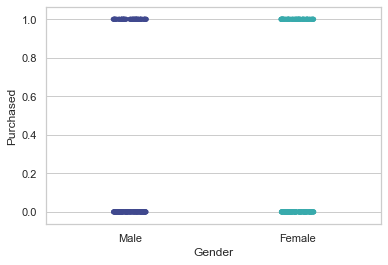

In [5]:
sns.stripplot('Gender', 'Purchased', palette='mako', data=df)

# *Age*

In [6]:
df.groupby(['Age','Purchased']).size().unstack(fill_value=0)

Purchased,0,1
Age,,
18,5,0
19,7,0
20,7,0
21,4,0
22,5,0
23,6,0
24,9,0
25,6,0
26,16,0


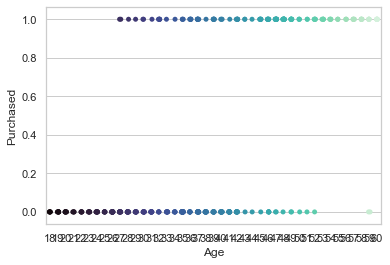

In [7]:
sns.stripplot('Age', 'Purchased', palette='mako', data=df)

# *EstimatedSalary*

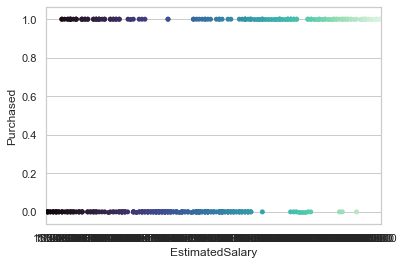

In [8]:
sns.stripplot('EstimatedSalary', 'Purchased', palette='mako', data=df)

## EDA: Quick Observations and Intuition

Based on this quick but important Exploratory Data Analysis, we seem to have discovered the following relationships:
- Males and females do not seem to differ on Purchase success
- Older users seem to be more likely to have Purchased from the ad
- Users with a higher EstimatedSalary appear to be more likely to have purchased from the ad

With these observations in hand, we can begin a more rigorous assessment of the relationship these variables have upon our dependent variable Y, the odds of a user purchasing from the advertisement, in the form of **Logistic Regression**.

But having conducted this EDA, we now have a strong sense of direction into what our hypotheses are going to be. For instance, we could now test our observation (and perhaps even intuition) that older users are more likely to purchase our product. 

**If this proves to be corroborated by our Logistic Regression results, we could then perhaps report back to a Marketing Team suggesting they concentrate more on advertising to older users.**


# Let's begin the Logistic Regression!

In [9]:
#First, we must turn Gender from a "string" variable type (i.e., it has characters instead of numbers) 
#into a numerical data type.

#We do this by "encoding" the string values of Gender into numbers.
#In this case, our code below will turn GenderMale = 1, and GenderFemale = 0. 

#When we interpret our Regression output, we have to keep track of this encoding.
le = LabelEncoder()
le.fit(df.Gender.unique())
df.Gender = le.transform(df.Gender) #male = 1, female = 0

In [10]:
#Let's now separate the dataframe into the Y and X variables
y = df['Purchased']
x = df[['Gender', 'Age', 'EstimatedSalary']]

In [11]:
#Then we fit the Logistic regression model onto our data
logit_model = sm.Logit(y,sm.add_constant(x))
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8


In [12]:
#... and now we view the results!
print(result.summary2())
print(result.summary())

                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.471     
Dependent Variable:  Purchased        AIC:              283.8432  
Date:                2020-11-30 09:22 BIC:              299.8091  
No. Observations:    400              Log-Likelihood:   -137.92   
Df Model:            3                LL-Null:          -260.79   
Df Residuals:        396              LLR p-value:      5.4877e-53
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      8.0000                                       
------------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
------------------------------------------------------------------
const           -12.7836   1.3592 -9.4049 0.0000 -15.4477 -10.1196
Gender            0.3338   0.3052  1.0938 0.2741  -0.2644   0.9321
Age               0.2370   0.0264  8.9839 0.0000   0.1853   0.2887
EstimatedSalary   0.0

# *Interpreting Regression Results*

If we recall the earlier PowerPoint presentation, we have essentially two goals for this quick intro to Logistic Regression:

**1.) Identify whether a relationship exists in the first place between Y and X.**

For Linear Regression, we know we can count on the R².

For Logistic Regression, many methods exist, but we can more or less count on the "Pseudo R²". In this case, our Pseudo R² is 0.4711, indicating a moderate goodness-of-fit.




**2.) Identify the extent to which X affects Y.**

For Linear Regression, we knew we can count on the coefficients, or "coef" values to understand how much Y is affected by every unit increase in X.

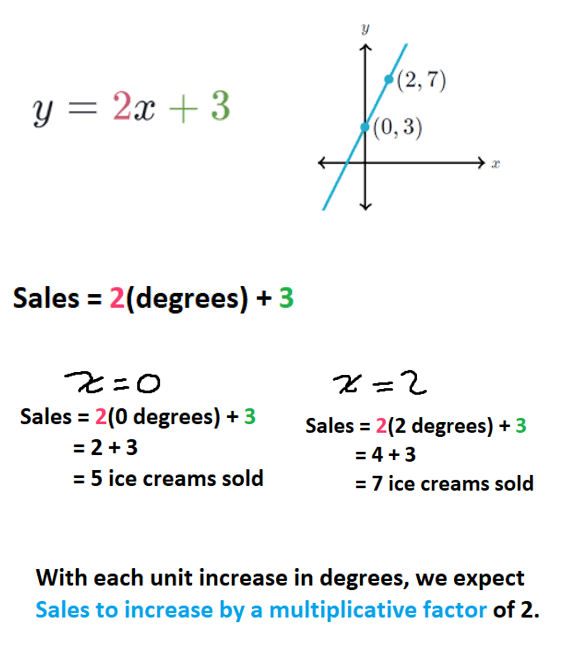




For Logistic Regression, we can count on the coefficients to do the same thing. 
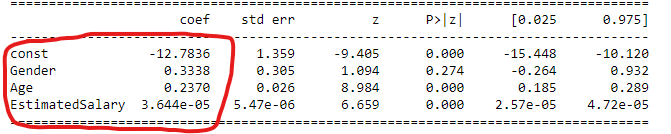

But unlike Linear Regression, we cannot simply take the coefficients **as they are presented**.

Recall that when we fit a Logistic Regression model, we force the S-shaped probability curve into a linear shape **by imposing the log()** on each value of the S-shaped curve: 

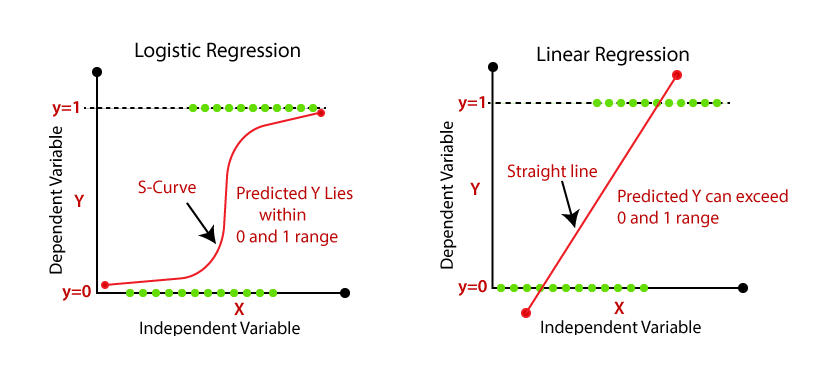

We must therefore reverse the log by taking the exponent of the coefficient values highlighted above in red, which are now transcribed below:

- Gender: 0.3338
- Age: 0.2370
- EstimatedSalary: 0.000003644

In [13]:
#Taking the exponent of the log: 
print(m.exp(0.3338))
print(m.exp(0.2370))
print(m.exp(0.000003644))

1.3962638628747914
1.2674411177752836
1.0000036440066393



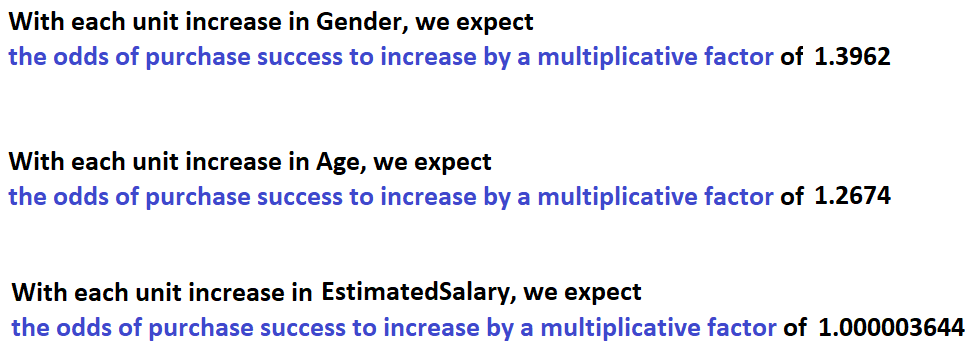

Although we now know how each X variable affects Y, based on the P-value, we know that we can only consider **Age and Estimated Salary** as the variables of significance.

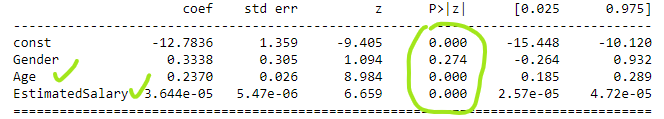